In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [20]:
happiness = pd.read_csv('worldwide_happiness_report.csv')

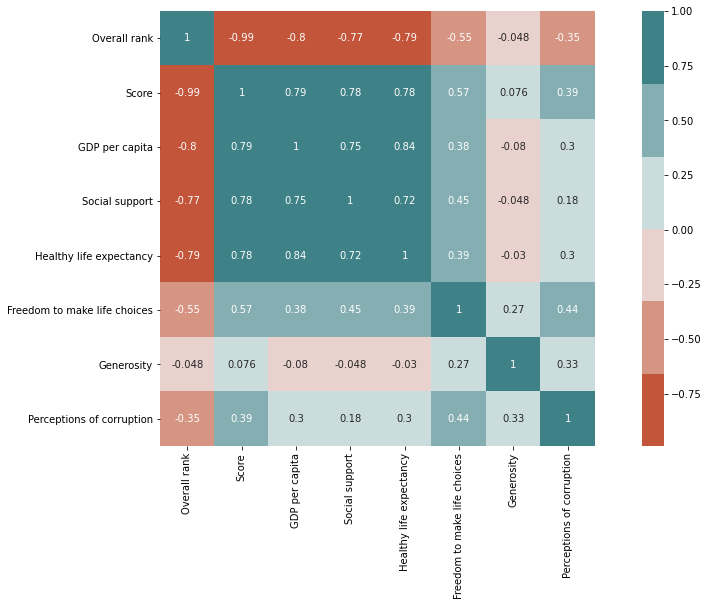

In [22]:
plt.figure(figsize=(17,8))
sns.heatmap(happiness.corr(),square=True,annot=True,cmap=sns.diverging_palette(20,200))
plt.show()

In [23]:
Y_variables = happiness['Score']
print(Y_variables.shape)
X_variables = happiness.drop(['Score','Country or region','Overall rank'],axis=1)
print(X_variables.shape)

(156,)
(156, 6)


In [29]:
#Choosing a split of 25 % for test data , with a random_state=0 inorder 
# to reproduce the result if needed.

x_train,x_test,y_train,y_test = train_test_split(X_variables,Y_variables,test_size=0.25,random_state=0)

In [30]:
feature_cols=['GDP per capita', 'Social support', 'Healthy life expectancy'] #list(x_train.columns)
X = x_train[feature_cols]
happiness_model = LinearRegression()
happiness_model.fit(X,y_train)
print('Intercept : ',happiness_model.intercept_)
print('Coefficients : ')
list(zip(feature_cols,happiness_model.coef_))

Intercept :  2.0313046209163
Coefficients : 


[('GDP per capita', 0.930760816275076),
 ('Social support', 1.510161323123918),
 ('Healthy life expectancy', 0.9890104958813664)]

In [43]:
#training the random forest model
RFmodel = RandomForestRegressor()
RFmodel.fit(x_train,y_train)

RandomForestRegressor()

In [44]:
#Prediction accuracy
y_predRF= RFmodel.predict(x_test)
r2 = metrics.r2_score(y_test,y_predRF)
print('R square : ',r2)

R square :  0.6332375540148593


In [ ]:
#Hyper Parameter tuning
estimator = RandomForestRegressor()
param_grid = { "n_estimators" :[50,100,200] ,
               "max_features" : ["auto", "sqrt", "log2"] ,
               "bootstrap": [True, False] ,
               "min_samples_split" : [2,4,8]
             }
grid = GridSearchCV(estimator, param_grid, cv=5)
grid.fit(x_train,y_train)
print(f"best parameters: {grid.best_params_}")
print(f"best score: {grid.score(x_test,y_test)}")

### We obtain 67 % accuracy with the random forest approach.